In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
df = pd.read_csv('../Brain/Output_7/peptide_level_filtered.csv')

In [24]:
tissue = 'Brain'

In [25]:
df = df[df.scaled_value>0]

In [26]:
df.head()

,Modified.Sequence,Day,Oxygen,Protein.Group,Genes,Stripped.Sequence,Run,value,Mouse ID,Kd,R2,scaled_value
0,AAAAGALAPGPLPDLAAR,0,8,Q3TW96,UAP1L1,AAAAGALAPGPLPDLAAR,10042022_DIA_SILAM_IHJ02_85_S1-H1_1_1579,7142.501887,15,0.053004,0.750307,0.950865
1,AAAAGALAPGPLPDLAAR,0,8,Q3TW96,UAP1L1,AAAAGALAPGPLPDLAAR,10042022_DIA_SILAM_IHJ02_48_S1-D12_1_1538,7880.666034,13,0.053004,0.750307,1.049135
2,AAAAGALAPGPLPDLAAR,0,8,Q3TW96,UAP1L1,AAAAGALAPGPLPDLAAR,10042022_DIA_SILAM_IHJ02_66_S1-F6_1_1558,8084.408961,14,0.053004,0.750307,1.076259
3,AAAAGALAPGPLPDLAAR,0,8,Q3TW96,UAP1L1,AAAAGALAPGPLPDLAAR,10042022_DIA_SILAM_IHJ02_27_S1-C3_1_1513,6967.708669,12,0.053004,0.750307,0.927595
5,AAAAGALAPGPLPDLAAR,0,60,Q3TW96,UAP1L1,AAAAGALAPGPLPDLAAR,10042022_DIA_SILAM_IHJ02_65_S1-F5_1_1557,8661.158402,9,0.053425,0.702879,1.191726


In [27]:
df['ln_values'] = np.log(df['value'])

In [28]:
Oxy = [8,21,60]
Day = [0, 2, 4, 8, 16,32]

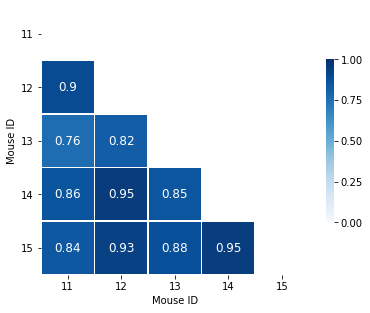

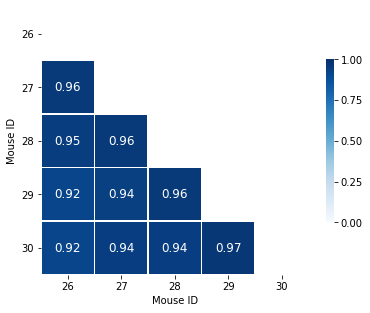

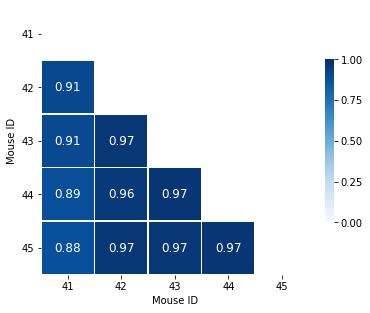

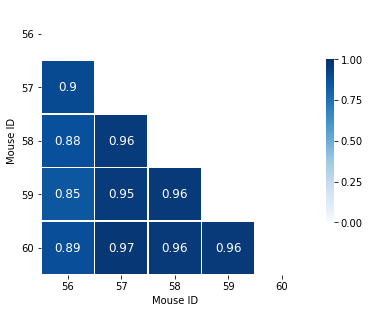

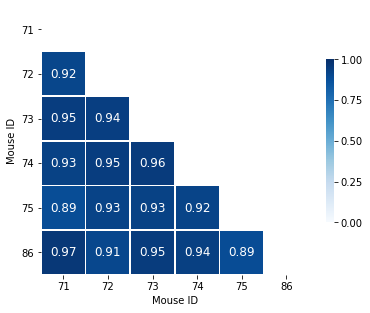

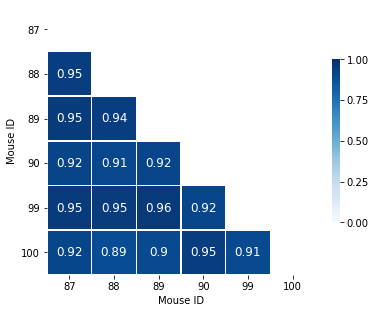

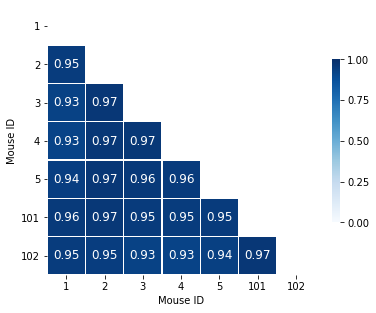

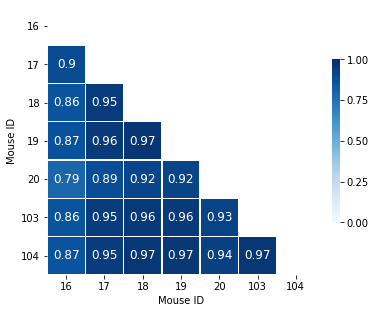

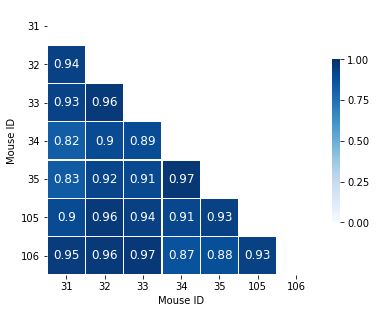

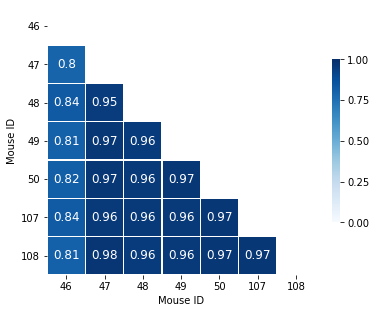

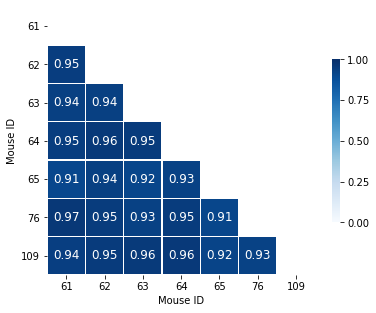

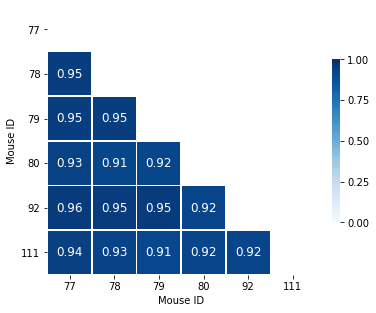

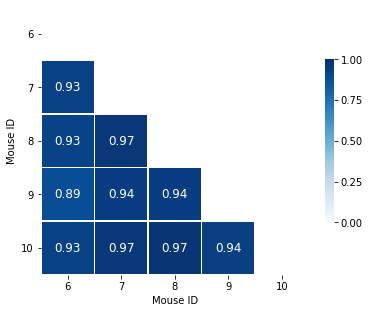

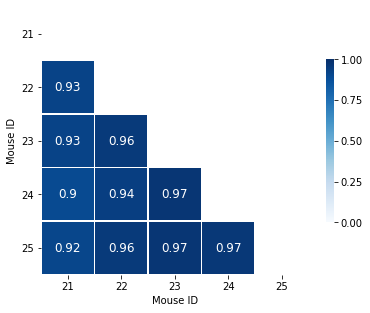

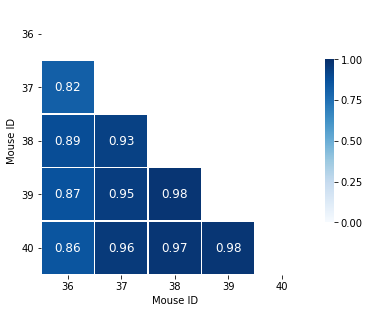

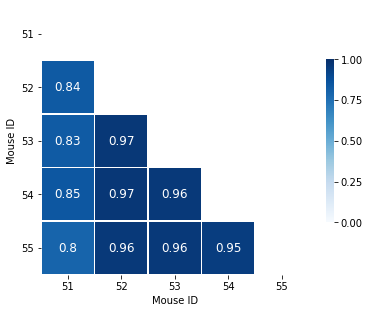

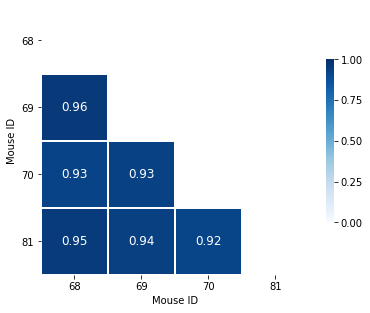

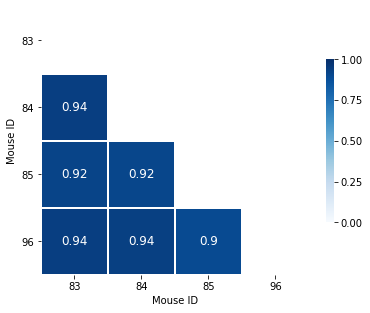

In [29]:
for i in Oxy:
    for j in Day: 
        df_sub = df[np.logical_and(df.Oxygen == i, df.Day == j)]
        df_p = df_sub.pivot(index='Modified.Sequence', columns='Mouse ID', values='ln_values')

        corr_matrix = df_p.corr()
        corr_matrix.to_csv('./Reproducibility Correlation Matrix/' + tissue +'/Reproducibility' + '_Oxy' + str(i) + '_D' + str(j)+ '.csv')
        
        mask = np.zeros_like(corr_matrix, dtype=np.bool)
        mask[np.triu_indices_from(mask)]= True
        
        
        f, ax = plt.subplots(figsize=(6, 7.5)) 
        heatmap = sns.heatmap(corr_matrix, 
                              mask = mask,
                              square = True,
                              linewidths = .5,
                              cmap = 'Blues',
                              cbar_kws = {'shrink': .4, 'ticks' : [0, 0.25, 0.5,0.75, 1]},
                              vmin = 0, 
                              vmax = 1,
                              annot = True,
                              annot_kws = {'size': 12})
        #add the column names as labels
        ax.set_yticklabels(corr_matrix.columns, rotation = 0)
        ax.set_xticklabels(corr_matrix.columns)
        sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
        
        plt.savefig('./Reproducibility Correlation Matrix/' + tissue +'/Reproducibility' + '_Oxy' + str(i) + '_D' + str(j)+ '.pdf')